In [1]:
import sys,os
import glob
import torch,dill
import torchvision.utils as vutils
import matplotlib.pyplot as plt
from iresnet import iResBlock
from spectral_norm import SN

In [2]:
paths = glob.glob(os.path.expanduser('~/tb-experiments/iresnet_WTW/**/*.trainer'),recursive=True)
print(paths)

['/home/marc/tb-experiments/iresnet_WTW/CIFAR10/iResnet/s0.5/trial0/checkpoints/c100.trainer']


In [3]:
trainer = torch.load(paths[-1],pickle_module=dill)
trainer.model.eval();

In [28]:
def change_tol(module):
    if isinstance(module,iResBlock):
        module.inverse_tol=1e-10
        print(module.iters_per_reverse)
    if isinstance(module,SN):
        print(module._s)
        

In [37]:
for mb in trainer.dataloaders['dev']:
    break
inp =x=mb[0]
trainer.model.apply(change_tol);

tensor(9.4902, device='cuda:0', requires_grad=True)
tensor(13.3506, device='cuda:0', requires_grad=True)
35.666666666666664
tensor(5.3615, device='cuda:0', requires_grad=True)
tensor(5.2701, device='cuda:0', requires_grad=True)
36.333333333333336
tensor(5.0658, device='cuda:0', requires_grad=True)
tensor(4.6416, device='cuda:0', requires_grad=True)
38.166666666666664
tensor(5.6219, device='cuda:0', requires_grad=True)
tensor(5.2871, device='cuda:0', requires_grad=True)
36.333333333333336
tensor(4.8579, device='cuda:0', requires_grad=True)
tensor(4.9789, device='cuda:0', requires_grad=True)
35.666666666666664
tensor(5.2526, device='cuda:0', requires_grad=True)
tensor(5.8363, device='cuda:0', requires_grad=True)
36.0
tensor(2.8049, device='cuda:0', requires_grad=True)
tensor(2.8872, device='cuda:0', requires_grad=True)
36.5


In [38]:
with torch.no_grad():
    output = trainer.model[1].body(inp)

In [39]:
sampled_imgs = trainer.model[1].sample(32).cpu().data

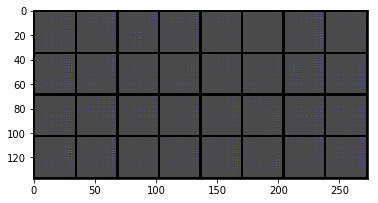

In [40]:
grid = vutils.make_grid(sampled_imgs, normalize=True)
plt.imshow(grid.permute(1,2,0))

In [41]:
grid.shape

torch.Size([3, 138, 274])

In [42]:
list(z_.shape for z_ in output)

[torch.Size([50, 64, 16, 16]),
 torch.Size([50, 128, 8, 8]),
 torch.Size([50, 256, 4, 4]),
 torch.Size([50, 256, 4, 4])]

In [43]:
with torch.no_grad():
    inp_reconstructed = trainer.model[1].body.inverse(output);

In [45]:
((inp_reconstructed[0] - inp[0]).norm()/(inp[0]).norm())

tensor(0.0087, device='cuda:0')

(array([  58.,  132.,   76.,   94.,   97.,  442., 2112.,   33.,   22.,
           6.]),
 array([-1.01957035, -0.7259915 , -0.43241265, -0.1388338 ,  0.15474505,
         0.44832391,  0.74190276,  1.03548161,  1.32906046,  1.62263931,
         1.91621816]),
 <a list of 10 Patch objects>)

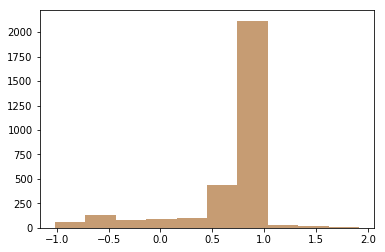

In [46]:
plt.hist(inp_reconstructed[0].cpu().data.numpy().reshape(-1),alpha=.5)
plt.hist(inp[0].cpu().data.numpy().reshape(-1),alpha=.5)

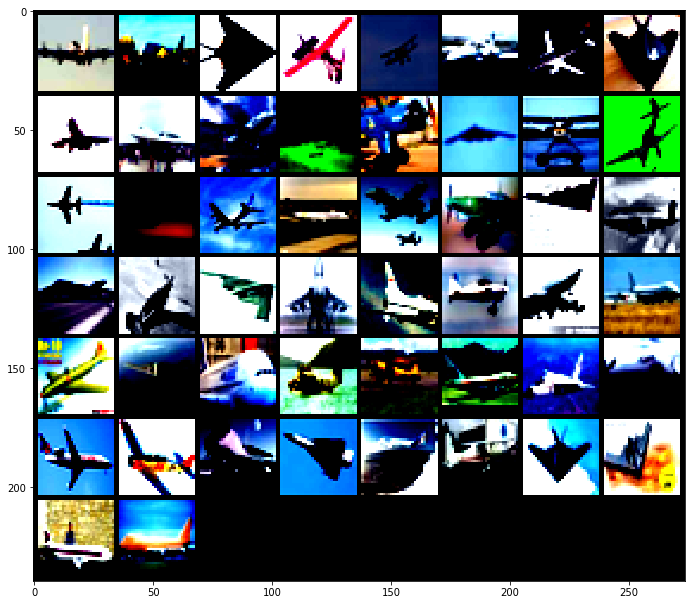

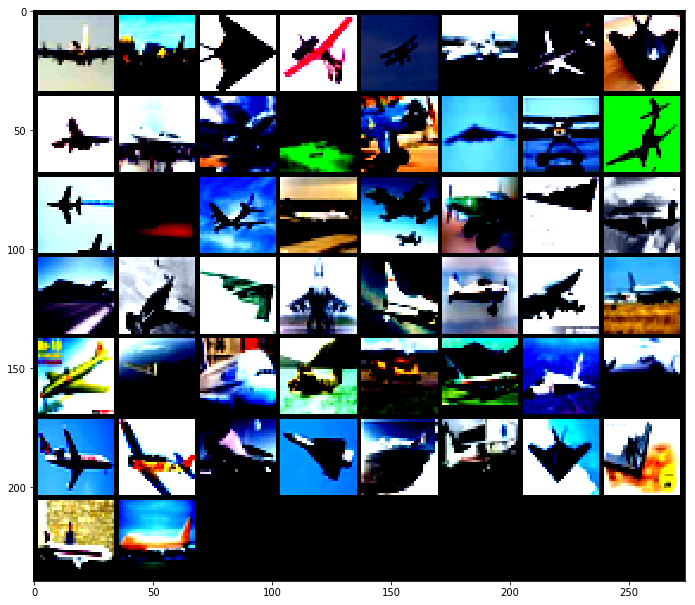

In [47]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#print(y.shape)
grid = vutils.make_grid(mb[0]).cpu().data.numpy().transpose(1,2,0)
plt.imshow(grid)
plt.show()
grid = vutils.make_grid(inp_reconstructed).cpu().data.numpy().transpose(1,2,0)
plt.imshow(grid)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [26]:
for zi in z: print(zi.shape)

NameError: name 'z' is not defined